In [122]:
# Import data science essentials
import pandas as pd
import numpy as np
from datetime import datetime,timedelta

# Import plotting essentials
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import animation, rc
from IPython.display import HTML

%matplotlib inline

In [2]:
btc_file = 'coin_Bitcoin.csv'
eth_file = 'coin_Ethereum.csv'

In [3]:
btc_df = pd.read_csv(btc_file,index_col='Date',parse_dates=True)
eth_df = pd.read_csv(eth_file,index_col='Date',parse_dates=True)

In [4]:
btc_df.head()

,SNo,Name,Symbol,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,,,,
2013-04-29 23:59:59,1,Bitcoin,BTC,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
2013-04-30 23:59:59,2,Bitcoin,BTC,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2013-05-01 23:59:59,3,Bitcoin,BTC,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
2013-05-02 23:59:59,4,Bitcoin,BTC,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
2013-05-03 23:59:59,5,Bitcoin,BTC,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [5]:
btc_df.shape

(2991, 9)

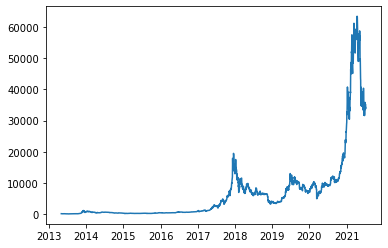

In [6]:
plt.plot(btc_df.index,btc_df['Close'])
plt.show()

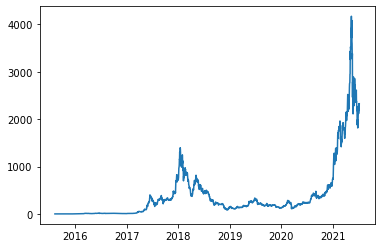

In [7]:
plt.plot(eth_df.index,eth_df['Close'])
plt.show()

In [8]:
rolling_btc_df = btc_df.rolling(window=30).mean()
rolling_btc_df

,SNo,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,,
2013-04-29 23:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-30 23:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-01 23:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-02 23:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-03 23:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2021-07-02 23:59:59,2972.5,36856.463381,34172.505273,35740.276234,35618.790261,3.995017e+10,6.673860e+11
2021-07-03 23:59:59,2973.5,36704.140338,34044.462700,35615.443281,35467.449674,3.958094e+10,6.645766e+11
2021-07-04 23:59:59,2974.5,36593.976368,34000.421206,35462.879235,35413.895489,3.901738e+10,6.635985e+11


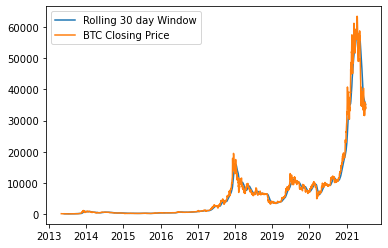

In [9]:
plt.plot(rolling_btc_df.index,rolling_btc_df['Close'],label='Rolling 30 day Window')
plt.plot(btc_df.index,btc_df['Close'],label='BTC Closing Price')
plt.legend()
plt.show()

In [190]:
last_date = btc_df.index.max()
year = last_date - timedelta(days=359)

end_date = f"{last_date.year}-{last_date.month}-{last_date.day}"
start_date = f"{year.year}-{year.month}-{year.day}"

In [191]:
a = btc_df[start_date:end_date]

In [192]:
a

,SNo,Name,Symbol,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,,,,
2020-07-12 23:59:59,2632,Bitcoin,BTC,9319.419417,9197.450320,9241.055044,9276.499850,1.445236e+10,1.709774e+11
2020-07-13 23:59:59,2633,Bitcoin,BTC,9306.404930,9224.292841,9277.204660,9243.613855,1.751982e+10,1.703797e+11
2020-07-14 23:59:59,2634,Bitcoin,BTC,9283.842142,9171.661118,9238.703228,9243.213416,1.808504e+10,1.703807e+11
2020-07-15 23:59:59,2635,Bitcoin,BTC,9275.325125,9171.933554,9241.897000,9192.837368,1.584473e+10,1.694601e+11
2020-07-16 23:59:59,2636,Bitcoin,BTC,9214.312698,9088.947402,9191.980234,9132.227863,1.571397e+10,1.683505e+11
...,...,...,...,...,...,...,...,...,...
2021-07-02 23:59:59,2987,Bitcoin,BTC,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2021-07-03 23:59:59,2988,Bitcoin,BTC,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2021-07-04 23:59:59,2989,Bitcoin,BTC,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11


In [193]:
a.index.min()+timedelta(days=360)

Timestamp('2021-07-07 23:59:59')

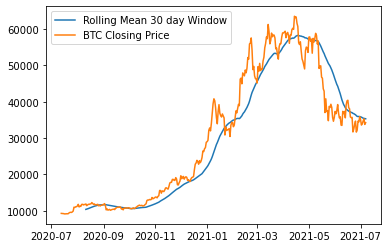

In [194]:
plt.plot(a.index,a['Close'].rolling(window=30).mean(),label='Rolling Mean 30 day Window')
plt.plot(a.index,a['Close'],label='BTC Closing Price')
plt.legend()
plt.show()

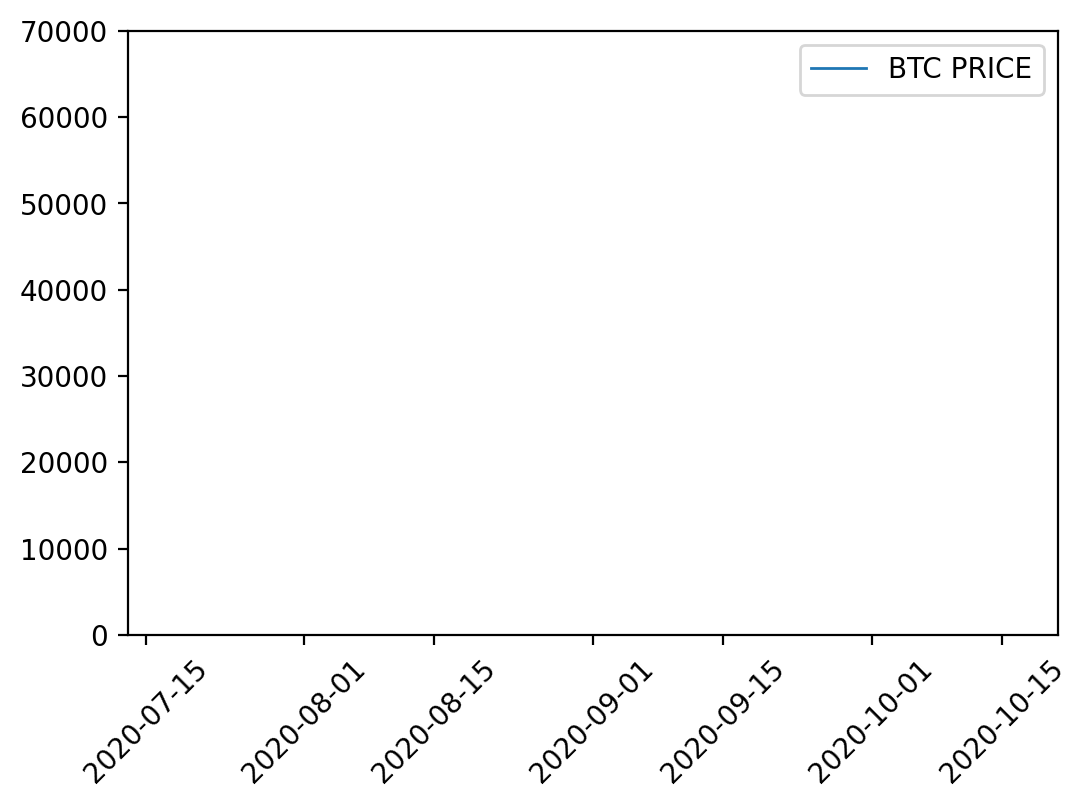

In [301]:

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure(dpi=200)

moving_window = 100
x_last = a.index.min()+timedelta(days=moving_window)
x_first = a.index.min()

ax = plt.axes(xlim=(x_first,x_last),ylim=(0,70000))
#ax.legend('BTC')
line, = ax.plot([], [], lw=1,label='BTC PRICE')
# line.axes.legend(line.get_label())
line.axes.tick_params(axis='x', labelrotation = 45)
plt.legend()

In [302]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

In [303]:
moving_window = 100
x_last = a.index.min()+timedelta(days=moving_window)
x_first = a.index.min()
dt = timedelta(days=1)

def animate(i):
    global x_last
    global x_first
    global dt
    
    x = a.index[:i]
    y = a['Close'][:i]
    line.set_data(x, y)
    
    if a.index[i] >= x_last-dt:
        x_last += dt 
        x_first += dt
        line.axes.set_xlim(x_first,x_last)
        
    return line,

In [304]:
anim = animation.FuncAnimation(fig, animate, init_func=init,frames=len(a.index), interval=170, blit=False)

In [305]:
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

In [ ]:
anim